In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlrd
import pandas as pd
from scipy import optimize as opt
from scipy.stats import poisson

In [22]:
files = dict()
df = pd.DataFrame()

# filling dictionary with name:path pairs of xls files
for name in os.listdir("data/task2"):
    if not name.startswith("~") and name.endswith("xls"):
        files[name.split("_")[0]] = "data//task2//" + name

# filling dataFrame with Y columns from all spectrums
for key in files:
    if key == "STAT":
        continue
    wb = xlrd.open_workbook_xls(files[key], encoding_override="iso-8859-1")
    df[key] = pd.read_excel(wb)["Y"]

Exercise 1.1

In [23]:
U_sm = [66.9, 53.4, 45.7, 27.6, 10.6, 7.0, 5.2]
A_out = [135, 134, 127, 111, 75, 60, 51]
tau = [0.8, 0.8, 0.8, 1, 1.2, 1.2, 1.3]

(0.0, 70.0)

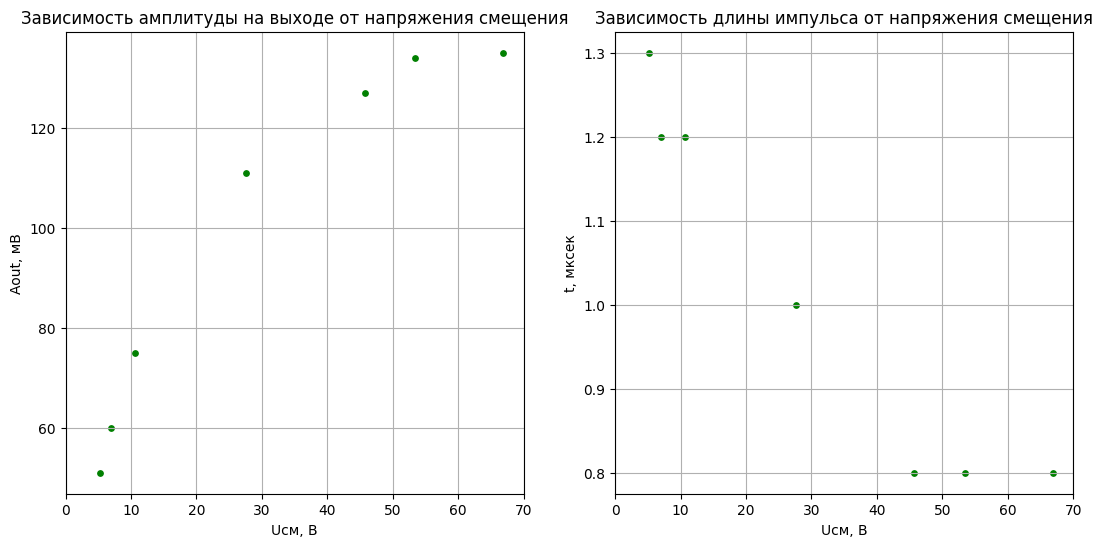

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].scatter(U_sm, A_out, s=15, color="green")
axs[1].scatter(U_sm, tau, s=15, color="green")

# let's make it nice
axs[0].grid()
axs[1].grid()

axs[0].set_title("Зависимость амплитуды на выходе от напряжения смещения") # change X to our element
axs[0].set_xlabel("Uсм, В")
axs[0].set_ylabel("Aout, мВ")
axs[0].set_xlim(0, 70)

axs[1].set_title("Зависимость длины импульса от напряжения смещения") # change X to our element
axs[1].set_xlabel("Uсм, В")
axs[1].set_ylabel("t, мксек")
axs[1].set_xlim(0, 70)

Exercise 2

In [34]:
N = [94, 192, 291, 392, 491, 591, 687, 786, 885]
A_gen = [47, 87, 140, 182, 229, 273, 320, 365, 410]

In [35]:
def kalibrovka(x, a, b):
    return a*x + b

popt, pcov = opt.curve_fit(kalibrovka, N, A_gen)
print(f"a = {popt[0]}\tb = {popt[1]}")

a = 0.4609987494531764	b = 2.272945961754004


Text(0, 0.5, 'Agen, мВ')

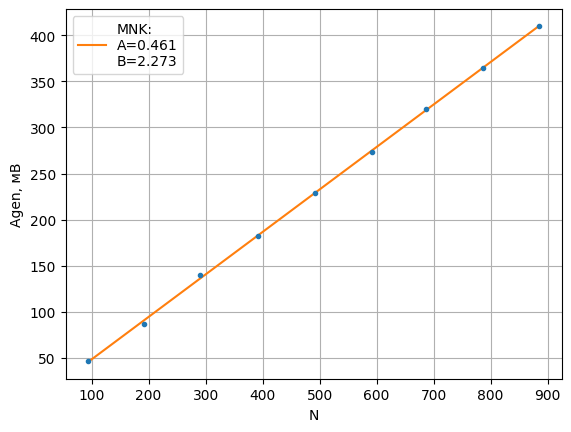

In [37]:
fig, axs = plt.subplots()
axs.errorbar(N, A_gen, fmt=".")
axs.plot(np.arange(N[0], N[-1], 0.1),
         kalibrovka(np.arange(N[0], N[-1], 0.1), popt[0], popt[1]),
         label=f"MNK:\nA={popt[0]:.3f}\nB={popt[1]:.3f}")
# let's make it nice
axs.grid()

axs.legend()
# axs.set_title("Зависимость амплитуды на выходе от напряжения смещения")
axs.set_xlabel("N")
axs.set_ylabel("Agen, мВ")

Text(0, 0.5, 'кол-во счетов')

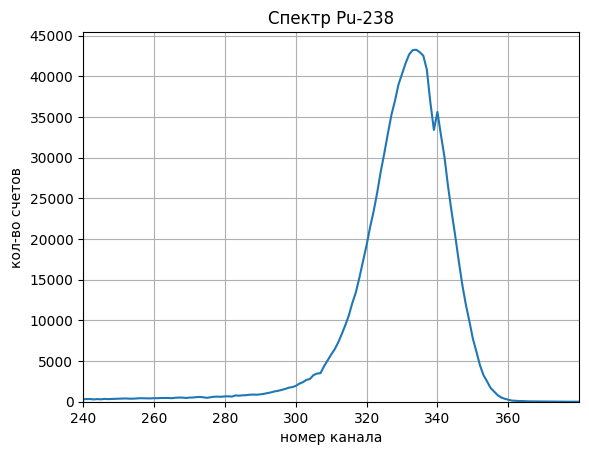

In [ ]:
x = np.arange(len(df)) # indexes
# Enter name of element to be plotted in brackets
data = df["pu238"]
plt.plot(x, data)

# let's make it nice
plt.grid()

plt.xlim(240, 380)
plt.ylim(0, 1.05 * max(data))

plt.xticks(np.arange(240, 380, 20))
plt.yticks(np.arange(0, 1.05 * max(data), 5000))

plt.title("Спектр Pu-238") # change X to our element
plt.xlabel("номер канала")
plt.ylabel("кол-во счетов")

Text(0, 0.5, 'кол-во счетов')

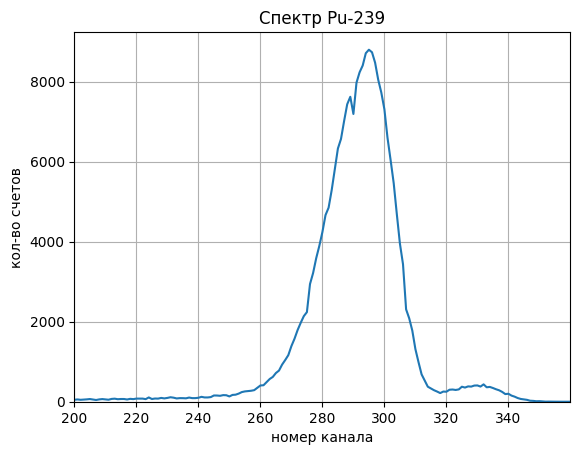

In [ ]:
x = np.arange(len(df)) # indexes
# Enter name of element to be plotted in brackets
data = df["pu239"]
plt.plot(x, data)

# let's make it nice
plt.grid()

plt.xlim(200, 360)
plt.ylim(0, 1.05 * max(data))

plt.xticks(np.arange(200, 360, 20))
plt.yticks(np.arange(0, 1.05 * max(data), 2000))

plt.title("Спектр Pu-239") # change X to our element
plt.xlabel("номер канала")
plt.ylabel("кол-во счетов")

Text(0, 0.5, 'кол-во счетов')

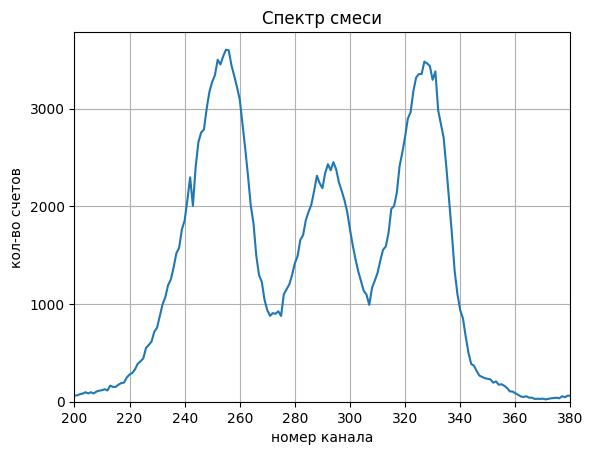

In [ ]:
x = np.arange(len(df)) # indexes
# Enter name of element to be plotted in brackets
data = df["sm"]
plt.plot(x, data)

# let's make it nice
plt.grid()

plt.xlim(200, 380)
plt.ylim(0, 1.05 * max(data))

plt.xticks(np.arange(200, 381, 20))
plt.yticks(np.arange(0, 1.05 * max(data), 1000))

plt.title("Спектр смеси") # change X to our element
plt.xlabel("номер канала")
plt.ylabel("кол-во счетов")

In [ ]:
maxPu238, maxPu239 = df[df["pu238"] == max(df["pu238"])]["pu238"], df[df["pu239"] == max(df["pu239"])]["pu239"]
print(maxPu238)
print(maxPu239)

popt, _ = opt.curve_fit(kalibrovka, np.array([295, 334]), np.array([5456, 5499]))
a, b = popt[0], popt[1]
a, b

334    43253
Name: pu238, dtype: int64
295    8800
Name: pu239, dtype: int64


c:\Users\krech\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(1.1025641025641097, 5130.743589743587)

Widths

Pu238=21 => 100% * 21/334 = 6.29%

Pu239=21 => 100% * 21/295 = 7.1%

sm=21 => 100% * 21/330 = 6.4%

avg = 6.6%

Text(0, 0.5, 'Кол-во счетов')

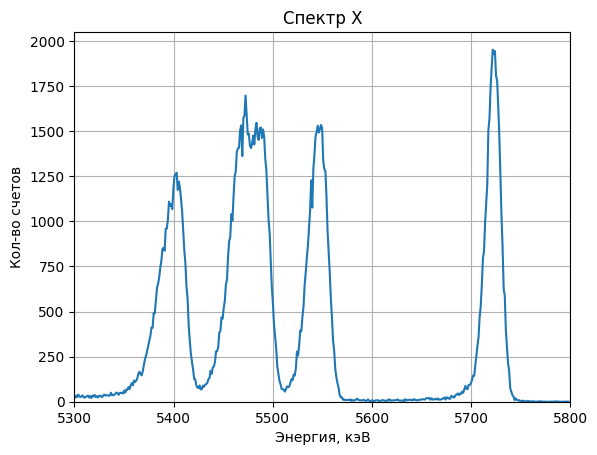

In [38]:
x = np.arange(len(df)) * a + b # energies
# Enter name of element to be plotted in brackets
data = df["x"]
plt.plot(x, data)

# let's make it nice
plt.grid()

plt.xlim(5300, 5800)
plt.ylim(0, 1.05 * max(data))

plt.title("Спектр X")
plt.xlabel("Энергия, кэВ")
plt.ylabel("Кол-во счетов")

Energies

E1=5401

E2=5472

E3=5490

E4=5545

E5=5722

Exercise 3

Text(0, 0.5, 'кол-во счетов')

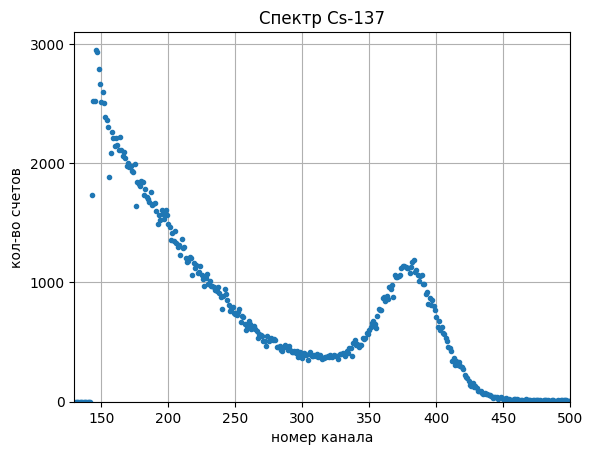

In [ ]:
x = np.arange(len(df)) # indexes
# Enter name of element to be plotted in brackets
data = df["cs137"]
plt.errorbar(x, data, fmt=".")

# let's make it nice
plt.grid()

plt.xlim(130, 500)
plt.ylim(0, 1.05 * max(data))

# plt.xticks(np.arange(200, 381, 20))
plt.yticks(np.arange(0, 1.05 * max(data), 1000))

plt.title("Спектр Cs-137") # change X to our element
plt.xlabel("номер канала")
plt.ylabel("кол-во счетов")

Text(0, 0.5, 'кол-во счетов')

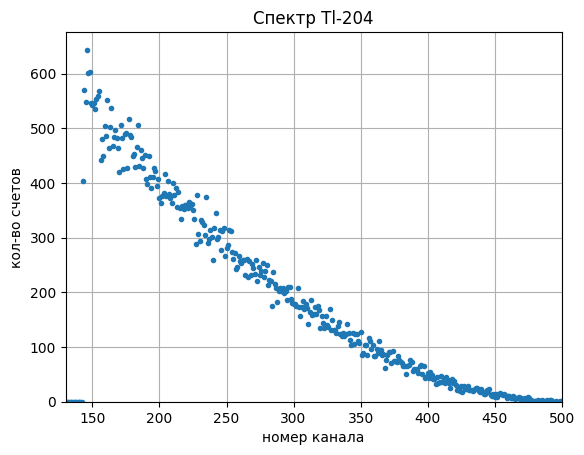

In [39]:
x = np.arange(len(df)) # indexes
# Enter name of element to be plotted in brackets
data = df["tl204"]
plt.errorbar(x, data, fmt=".")

# let's make it nice
plt.grid()

plt.xlim(130, 500)
plt.ylim(0, 1.05 * max(data))

# plt.xticks(np.arange(200, 381, 20))
# plt.yticks(np.arange(0, 1.05 * max(data), 1000))

plt.title("Спектр Tl-204") # change X to our element
plt.xlabel("номер канала")
plt.ylabel("кол-во счетов")

Exerise 4

In [ ]:
wb = xlrd.open_workbook_xls(files["STAT"])
df = pd.read_excel(wb)
df = df.dropna()

y = np.zeros(len(df))
for i in range(len(df) - 1):
    y[i] = df["N"].values[i+1] - df["N"].values[i]

avg, err = y.mean(), np.sqrt(y.mean())
avg, err

(22.71014492753623, 4.76551622886086)

In [ ]:
# sum of elements in range for different sigmas
sigms = np.array([0, 0, 0])
for i in range(3):
    for el in y:
        if el < avg + (i+1)*err and el > avg - (i+1)*err:
            sigms[i] += el

sigms = sigms/sum(y)
print("experiment")
print(f"1 sigm: {sigms[0]}\n2 sigm: {sigms[1]}\n3 sigm: {sigms[2]}")

experiment
1 sigm: 0.7124016166773027
2 sigm: 0.9585194639438417
3 sigm: 0.9819187406934695


In [ ]:
# puasson distribution
puas = poisson.rvs(mu=avg, size=50000)
avg, err = y.mean(), np.sqrt(avg)

# sum of elements in range for different sigmas
sigms = np.array([0, 0, 0])
for i in range(3):
    for el in puas:
        if el < avg + (i+1)*err and el > avg - (i+1)*err:
            sigms[i] += el

sigms = sigms/sum(puas)
print("theory")
print(f"1 sigm: {sigms[0]}\n2 sigm: {sigms[1]}\n3 sigm: {sigms[2]}")

theory
1 sigm: 0.6984673554627391
2 sigm: 0.9488177621455265
3 sigm: 0.9963886568476589


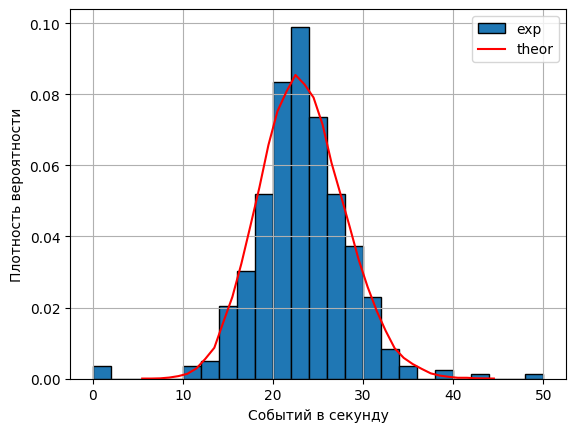

In [ ]:
puas = poisson.rvs(mu=avg, size=50000)

plt.hist(y, density=True, bins=25, edgecolor="black", label="exp")
# plt.hist(puas, density=True, edgecolor="black", bins=25, color="white", histtype="step")
hist_y, hist_x = np.histogram(puas, bins=40, density=True)
plt.plot(0.5 * (hist_x[1:] + hist_x[:-1]), hist_y, color="red", label="theor")

plt.grid()
plt.ylabel("Плотность вероятности")
plt.xlabel("Событий в секунду")
plt.legend()